In [1]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# The Boltzmann Distribution
Recall the Einstein solid multiplicity

$$\Omega = \frac{\left(N+q-1\right)!}{q!\left(N-1\right)!}$$

Consider a hypothetical system of two solids with $N_A = 1$ and $N_B = 10$ oscillators and $q=5$. This is a model small system interacting with a large reservoir. The multiplicity of the macrostates are

|$q_A$|$\Omega_A$|$q_B$|$\Omega_B$|$\Omega_A\Omega_B$|
|-----|----------|-----|----------|-----------------------|
|  0  |     1    |  5  |   2002   |      2002             |
|  1  |     1    |  4  |    715   |       715             |
|  2  |     1    |  3  |    220   |       220             |
|  3  |     1    |  2  |     55   |        55             |
|  4  |     1    |  1  |     10   |        10             |
|  5  |     1    |  0  |      1   |         1             |

Below, these multiplicities are calculated. Shift-Enter to verify them.

In [ ]:
NA = 1
NB = 10
q = np.linspace(0, 5, 6, dtype=int)
OmegaA = np.zeros(len(q))
OmegaB = np.zeros(len(q))
index = 0
for i in q:
  OmegaA[index] = factorial(NA+i-1)/factorial(i)/factorial(NA-1)
  OmegaB[index] = factorial(NB+5-i-1)/factorial(5-i)/factorial(NB-1)
  print("qA =", i, "Omega_A =", OmegaA[index],"qB =", 5-i, "Omega_B =", OmegaB[index], "Omega_tot =", OmegaA[index]*OmegaB[index])
  index += 1

qA = 0 Omega_A = 1.0 qB = 5 Omega_B = 2002.0 Omega_tot = 2002.0
qA = 1 Omega_A = 1.0 qB = 4 Omega_B = 715.0 Omega_tot = 715.0
qA = 2 Omega_A = 1.0 qB = 3 Omega_B = 220.0 Omega_tot = 220.0
qA = 3 Omega_A = 1.0 qB = 2 Omega_B = 55.0 Omega_tot = 55.0
qA = 4 Omega_A = 1.0 qB = 1 Omega_B = 10.0 Omega_tot = 10.0
qA = 5 Omega_A = 1.0 qB = 0 Omega_B = 1.0 Omega_tot = 1.0


We can look at the probability for solid A to have a particular amount of the total energy by looking at the probability of the entire system.

$$P(q) = \frac{\Omega_A(q_A)\cdot\Omega_B(q-q_A)}{\sum_q\Omega_A\cdot\Omega_B}$$

Let's plot the probability vs. energy in the single oscillator $q_A$. Shift-Enter the cell below to see this plot with an exponential function fitted to it.

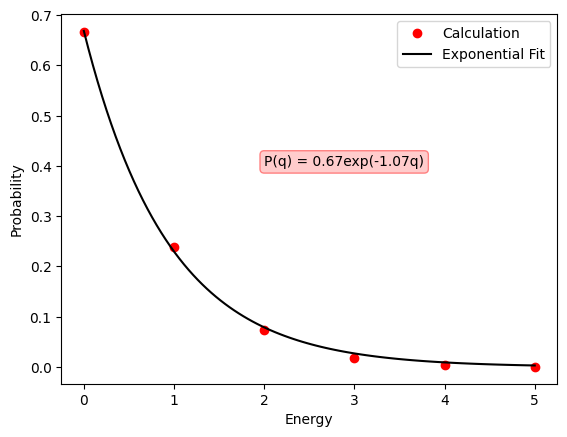

In [ ]:
def expfit(x, a, b):
  return a*np.exp(-b*x)

ps, covs = curve_fit(expfit, q, OmegaA*OmegaB/np.sum(OmegaA*OmegaB))
xs = np.linspace(0, 5, 100)
stra = '{:3.2f}'.format(ps[0])
strb = '{:3.2f}'.format(ps[1])

plt.plot(q, OmegaA*OmegaB/np.sum(OmegaA*OmegaB), 'or', label='Calculation')
plt.plot(xs, expfit(xs, ps[0], ps[1]),'-k', label='Exponential Fit')
plt.xlabel('Energy')
plt.ylabel('Probability')
plt.legend()
plt.text(2, 0.4,'P(q) = '+stra+'exp(-'+strb+'q)', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.show()

This distribution of energy is known as the Boltzmann Distribution. The Boltzmann Distribution describes the occupancy of various energies or the distribution of energy in a system. It can be thought of in two pieces. The first piece is the distribution itself. We call the terms of the distribution **Boltzmann Factors**.

$$\text{Boltzmann Factor} = e^{-\frac{E_i}{kT}}$$

One can think of the energies $E_i$ as integer multiples of `epsilon`, which is the size of energy quanta $\epsilon = 1.6\times 10^{-21}$ Joules, and we'll plot the factors for quanta $0\le q\le 10$ quanta. The quanta are the $q$ values from the Einstein solid, and the energy for a particular quantum state is $E_i = q\epsilon$. The Boltzmann factors describe the amplitude associated with a particular energy $E_i$. Let's plot the Boltzmann Factors to see how they look.
* Enter the code for the Boltzmann Factors below.

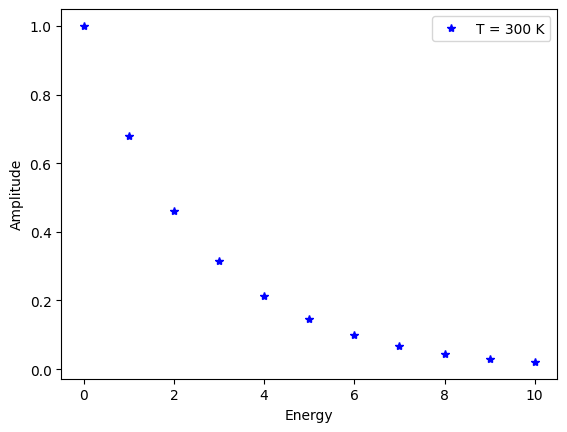

In [8]:
k = 1.381e-23 #Boltzmann constant in J/K
T = 300 #temperature
q = np.linspace(0, 10, 11) #quanta
epsilon = 1.6e-21 #energy in units of 0.01 eV
Ei = q*epsilon
BoltzmannFactors = np.exp(-Ei/k/T)

plt.plot(q, BoltzmannFactors, '*b',label='T = '+str(T)+ ' K')
plt.xlabel('Energy')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Notice the Boltzmann Factors go from 1 to 0. The Boltmann Distribution is a probability distribution and should total to 1. <font color=red>Discuss how you could convert Boltzmann Factors into the Boltzmann Distribution. Implement your plan below, and check that it works by printing the .</font>

HINT: A list of values can be summed with `np.sum(list)`.

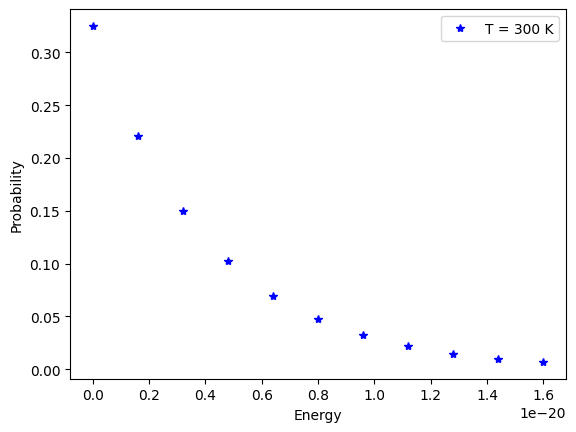

In [23]:
k = 1.381e-23 #Boltzmann constant in J/K
T = 300 #temperature
q = np.linspace(0, 10, 11) #quanta
epsilon = 1.6e-21 #energy in units of 0.01 eV
Ei = q*epsilon
BoltzmannFactors = np.exp(-Ei/k/T)
Z = np.sum(BoltzmannFactors)
BoltzmannDistribution = BoltzmannFactors/Z

plt.plot(Ei, BoltzmannDistribution, '*b', label='T = '+str(T)+ ' K')
plt.xlabel('Energy')
plt.ylabel('Probability')
plt.legend()
plt.show()

This process of going from Boltzmann Factors to Boltzmann distribution is called **normalization**. The value that normalizes the Boltzmann Factors is called the **Partition Function** even though it is a number and not a function. Typically, the partition function is defined by the variable $Z$. It can be written mathematically as

$$Z = \sum_{i=1}^N e^{-\frac{E_i}{kT}}$$

and the Boltzmann Distribution is

$$P(E_i)=\frac{1}{Z}e^{-\frac{E_i}{kT}}$$

Now, let's see how temperature affects the Boltzmann Distribution.
* Create two temperatures `T1 = 300` and `T2 = 500`.
* Plot the Boltzmann Distribution of both temperatures below by copying and editing code from above.
* Are the partition functions the same for the two distributions? Your answer to this affects how you calculate the two distributions.
* Describe the differences in the two Boltzmann Distributions. Is this what you would expect? Explain what is happening to the probability of an atom being in various energy states as thermal energy increases.

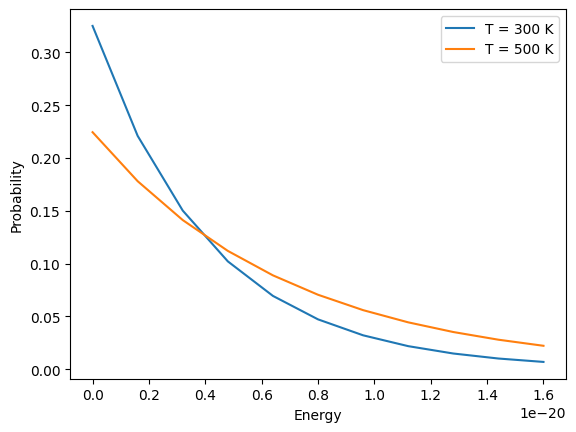

In [24]:
k = 1.381e-23 #Boltzmann constant
T1 = 300 #temperature
T2 = 500
q = np.linspace(0,10, 11) #quanta
epsilon = 1.6e-21 #energy in units of 0.01 eV
Ei = q*epsilon
Boltzmann1 = np.exp(-Ei/k/T1)
Boltzmann1 /= np.sum(Boltzmann1)
Boltzmann2 = np.exp(-Ei/k/T2)
Boltzmann2 /= np.sum(Boltzmann2)

plt.plot(Ei, Boltzmann1, label='T = '+str(T1)+ ' K')
plt.plot(Ei, Boltzmann2, label='T = '+str(T2)+ ' K')
plt.xlabel('Energy')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Partition Function Convergence
We can technically keep adding Boltzmann Factors to the partition function until $q\rightarrow \infty$, but this is not desirable. Let's take a look at the first three Boltzmann Factors for a system with $\epsilon=0.01$ eV at room temperature. This is the same system as above, but we will switch to energy units of eV. The Boltzmann constant is $k = 8.62\times 10^{-5}$ eV/K. At room temperature (300 K), $kT \approx 0.025$ eV.

<font color=red> Describe the exponential Boltzmann factors when $\epsilon$ is smaller, comparable, and larger than $kT$. What does this tell you about energy level accessibility with temperature?</font>

Below, we want get a feel for how many Boltzmann Factors are needed to converge the partition function. That is, at what point will adding another Boltzmann Factor not significantly affect the partition function value?

* Fill in the code for the first three energy levels $E_q = q * 0.01$,
  * Theses will be for $q = 0, 1, 2$ and the variables are `E0, E1, E2`.
* Fill in the code for the first three Boltzmann Factors (`BF0, BF1, BF2`) using your energy value calculations.
* Fill in the code to calculate the partition function, $Z$, as the sum of Boltzmann Factors.

In [ ]:
k = 8.62e-5
T = 295
#Energies
E0 = 0*0.01 #q=0
E1 = 1*0.01 #q=1
E2 = 2*0.01 #q=2

#Boltzmann Factors
BF0 = np.exp(-E0/(k*T))
BF1 = np.exp(-E1/(k*T))
BF2 = np.exp(-E2/(k*T))

#Partition Function
Z = BF0 + BF1 + BF2

print('BF0 =', '{:1.3f}'.format(BF0), ', BF1 =', '{:1.3f}'.format(BF1), ', BF2 =', '{:1.3f}'.format(BF2), ', Z =', '{:1.3f}'.format(Z))

BF0 = 1.000 , BF1 = 0.675 , BF2 = 0.455 , Z = 2.130


We see they are decreasing, but when do they become negligible? The examples at the beginning of this tutorial show you how to make arrays and sum the arrays, but we really need to keep track of when the Boltztmann Factors get small, and the partition function is essentially converged. Below is one method. We know the Boltzmann factors go between 0 and 1 for simple systems (We'll see something more complicated next.). We can loop over the quanta $q$ and add the Boltzmann Factor to the partition function until a condition is met. For example, suppose you want to add the Boltzmann Factors to $Z$ until the Boltmann Factors are 100 times smaller than the largest Boltzmann Factor. The method in pseudocode is like above but with a `while` loop.

* Set the quanta $q$.
* Calculate $E_q$.
* Use $E_q$ to calculate the Boltzmann Factor.
* Add the Boltzmann Factor to $Z$
* While the Boltzmann Factor is larger than 0.01, increase $q$ and repeat.

Shift-Enter the code below to see this work.
* Try changing the temperature to something cooler (e.g., 100 K).
* Try changing the temperature to something warmer (e.g., 500 K).

<font color=red>How does temperature affect the number of terms needed to make $Z$ converge? Can you explain in terms of the exponential function that describes the Boltzmann Factors? Can you describe in terms of how energy occupancy changes with temperature?</font>

In [ ]:
k = 8.62e-5
T = 295
q = 0 #set q
Z = 0 #make sure Z is zero because we are going to add to it
BF = 1 #initialize Boltzmann Factor so we get into the loop
BFmax = 1 #initialize Boltzmann Factor so we get into the loop
while (BF>0.01):
  #Energy
  Eq = q*0.01 #Calculate Eq
  #Boltzmann Factors
  BF = np.exp(-Eq/(k*T))
  Z  = Z + BF
  q = q + 1

print('q = ', '{:01}'.format(q-1), 'BF =', '{:1.3f}'.format(BF), ', Z =', '{:1.3f}'.format(Z))

q =  12 BF = 0.009 , Z = 3.057


It should becoming clear that the exponential function has an argument $E_i/kT$ that describes the energy of a particle in a system relative to the thermal energy, and depending on this ratio, the particle will occupy energies with different probabilities.

## Rotational Energy Example
Let's do an example that is more complex. Assume that you have a collection of HCl (hydrogen chloride) gas atoms. A cartoon of such an atom is shown below. Hydrogen is about 35 times less massive than chlorine, and rotations would be about the center of mass, very close to the chlorine atom.

<img src="https://alchetron.com/cdn/hydrogen-chloride-65c63067-1b64-4a70-a589-dccb76a7b83-resize-750.png" width="400">

These atoms have rotational kinetic energies that are described quantum mechanically by

$$E_{rot} = j\left(j+1\right)\frac{\hbar^2}{2I}$$

where $j$ is the angular momentum quantum number from 0 to any integer level. In this example, it is equivalent to $q$ from above. $\hbar=6.58\times 10^{-16}$ eV$\cdot$s is Planck's constant. $I$ is the rotational moment of inertia of the molecule. We will assume that $\hbar^2/2I$ is a constant. <font color=blue>This isn't quite true because larger vibrational energies make the bond length longer, increasing the moment of inertia.</font>

$$E_{rot} = j\left(j+1\right)\epsilon$$

where we will assume the value of $\epsilon\approx 0.001$ eV. Rotational energies are larger than translational energies, but smaller than vibrational energies found in Einstein solids (the example above). Each energy state, $j$, has a multiplicity or **degeneracy** of $2j+1$ because rotations can be along the 3D axes with varying amounts projecting along the z-axis. The degeneracy is shown in the figure below.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Degenerate_energy_levels.svg/1280px-Degenerate_energy_levels.svg.png" width="400">

Remember, the Boltzmann constant is $k = 8.62\times 10^{-5}$ eV/K. At room temperature $kT = 0.025$ eV. In the cell below

* Calculate the first three rotational enegies.
* Use those energies to calculate Boltzmann Factors.
  * Multiply the Boltzmann Factors by their degeneracy because degeneracy makes them more probable.
* Use the Boltzmann Factors to calculate the partition function.


<font color=red>Techinically, $j$ can go to infinity. We do not want to sum infinite terms. How can you determine whether you have calculated enough energy levels to accurately normalize the Boltzmann Factors?</font>

In [13]:
k = 8.62e-5
T = 295
epsilon = 0.001
#Energies
E0 = 0*(0+1)*epsilon
E1 = 1*(1+1)*epsilon
E2 = 2*(2+1)*epsilon

#Boltzmann Factors
BF0 = (2*0+1)*np.exp(-E0/(k*T))
BF1 = (1*1+1)*np.exp(-E1/(k*T))
BF2 = (2*1+1)*np.exp(-E2/(k*T))

#Partition Function
Z = BF0 + BF1 + BF2

print('BF0 =', '{:1.3f}'.format(BF0), ', BF1 =', '{:1.3f}'.format(BF1), ', BF2 =', '{:1.3f}'.format(BF2), ', Z =', '{:1.3f}'.format(Z))

BF0 = 1.000 , BF1 = 1.849 , BF2 = 2.369 , Z = 5.218


Now, we see that the Boltzmann Factors *increase*! Do they continue to increase with $j$? Let's plot them. The graph below is a bar graph so that it looks like your textbook Figure 6.7. In the cell below

* Calculate energies `Ej` using `j`. This will be an array of energies.
* Calculate the Boltzmann Factors `BF` using your `Ej` calculations.
* Change the number `j` values (initially set to 3) until the graph shows a convergence at high `j` values.

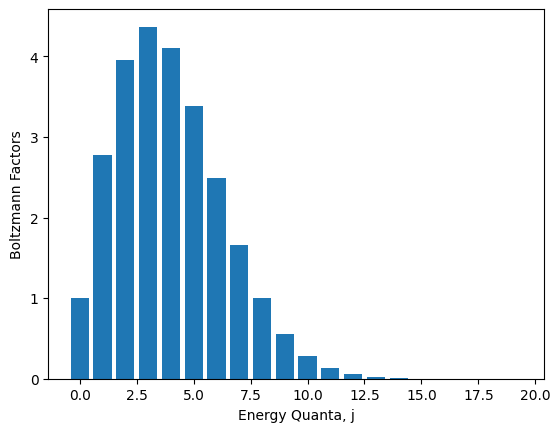

In [19]:
k = 8.62e-5
T = 295
j = np.arange(0, 20, 1)
Ej = j*(j+1)*0.001
BF = (2*j+1)*np.exp(-Ej/(k*T))

plt.bar(j, BF)
plt.xlabel('Energy Quanta, j')
plt.ylabel('Boltzmann Factors')
plt.show()

We see the Boltzmann Factors get small for $j>10$, but we know from the Einstein solid that this is a temperature-dependent thing. For example, below is the same system's Boltzmann Factors for $T=295$ K and $T=500$ K. You can see that the higher temperature will require more terms in the partition function.

Shift-Enter to see the graph.

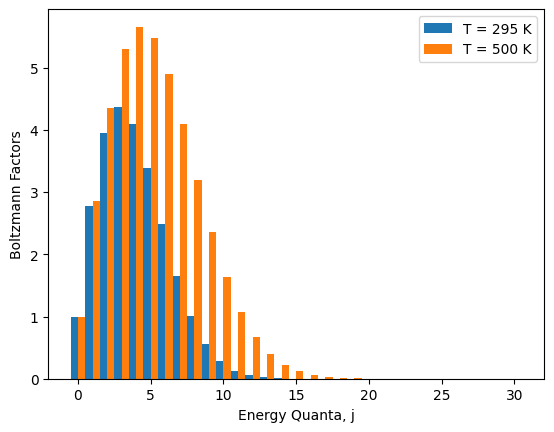

In [ ]:
k = 8.62e-5
T1 = 295
T2 = 500
j = np.arange(0, 31, 1)
Ej = j*(j+1)*0.001
BF1 = (2*j+1)*np.exp(-Ej/(k*T1))
BF2 = (2*j+1)*np.exp(-Ej/(k*T2))

plt.bar(j-0.25, BF1, width=0.5, label='T = '+str(T1)+ ' K')
plt.bar(j+0.25, BF2, width=0.5, label='T = '+str(T2)+ ' K')
plt.xlabel('Energy Quanta, j')
plt.ylabel('Boltzmann Factors')
plt.legend()
plt.show()

Fortunately, we can use the same method to find the cut-off for adding to the Boltzmann Factors because the factors start at 1 and get larger before getting smaller. Use the code below to verify our conclusions about the number of terms from above, i.e., more than ten factors for $T=295$ K and more than about 15 terms for $T=500$ K.

In [ ]:
k = 8.62e-5
T = 295
j = 0 #set q
Z = 0 #make sure Z is zero because we are going to add to it
BF = 1 #initialize Boltzmann Factor so we get into the loop
while (BF>0.01):
  #Energy
  Ej = j*(j+1)*0.001 #Calculate Eq
  #Boltzmann Factors
  BF = np.exp(-Ej/(k*T))
  Z  = Z + BF
  j = j + 1

print('j = ', '{:01}'.format(j-1), 'BF =', '{:1.3f}'.format(BF), ', Z =', '{:1.3f}'.format(Z))

j =  14 BF = 0.008 , Z = 5.845


Okay, let's put this all together and plot the probability distribution (Boltzmann Distribution) for rotational energies of diatomic molecules.

In the cell below

* Calculate `Ej` using enough `j` values to converge.
* Calculate `BF1` using `T1`.
* Calculate `BF2` using `T2`.
* Shift-Enter.

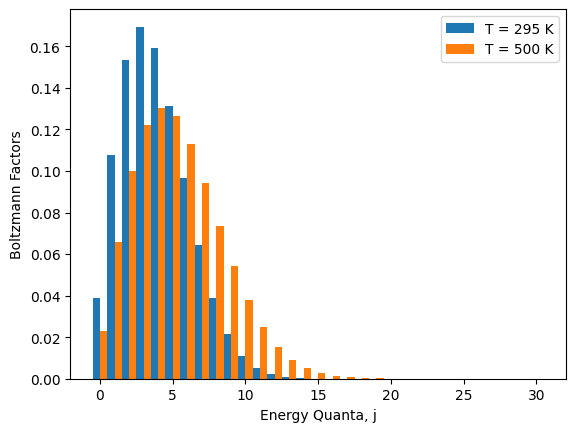

In [ ]:
k = 8.62e-5
T1 = 295
T2 = 500
j = np.arange(0, 31, 1)
Ej = j*(j+1)*0.001
BF1 = (2*j+1)*np.exp(-Ej/(k*T1))
BF1 /= np.sum(BF1)
BF2 = (2*j+1)*np.exp(-Ej/(k*T2))
BF2 /= np.sum(BF2)

plt.bar(j-0.25, BF1, width=0.5, label='T = '+str(T1)+ ' K')
plt.bar(j+0.25, BF2, width=0.5, label='T = '+str(T2)+ ' K')
plt.xlabel('Energy Quanta, j')
plt.ylabel('Boltzmann Factors')
plt.legend()
plt.show()

<font color=red>What do you think? This distribution is very different from the system with no degeneracy. What does it say about rotational energies that is different from non-degenerate systems like the Einstein Solid?</font>

Below is a graph of infrared absorption by HCl at room temperature. There is a symmetry about the center because the center is the frequency of infrared light that stimulates a vibrational transition from level 0 to level 1. The vibrational transition can be accompanied by an upward rotational transition $j\rightarrow j+1$ or a downward rotational transition $j\rightarrow j=1$. So, the left side is a mirror reflection of the right side. Can you see the Boltzmann Distribution in the graph?

<img src="https://lh3.googleusercontent.com/proxy/GptN8JuuOld074y7cpOmTC23MwVOmpGZ-AXgIo6k8XYUpQyRr64b_1I9KIJ3fRxDUAzM0CpqSguOeR_n4uDMdiDzIuIuK3mo_XVkgw-_xX08ZW5xLIPsHXLyFoROFGAxodllNnrqMLfEEum5L7lDAgtayos91jLDq7SFoNorDf5zp6mxOGwO1-oz" width="700">